# Tests verification chain with polarization only

In [62]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import healpy as hp
import astropy.io.fits as fits
from matplotlib.colors import LogNorm, SymLogNorm

In [63]:
nside = 64
lmax = nside*2
lmin = 2

nstokes = 2
number_correlations = 4

jump_iter = 1
n_iter = 8

In [64]:
noise_level = 10**(-7)

In [65]:
file_ver = 'PolarClassicalGibbsFullChainv1a' # Full chain sampling only polar

mask_name = 'fullsky'

dir_path = '/Users/mag/Documents/PHD1Y/Space_Work/Pixel_non_P2D/data_files/run_validation_classical_sampling/run_validation_full_chain/'

path_map_CMB = dir_path + "Map_ver{}_only_CMB_{}.fits".format(file_ver, lmax)
path_map_wn = dir_path + "Map_ver{}_only_wn_{}.fits".format(file_ver, lmax)
path_map_total = dir_path + "Map_total_{}_CMB_plus_white_noise_{}.fits".format(file_ver, lmax)


outname_camb = dir_path + 'CAMB_{}_ver{}_nside{:3d}_{}.npy'.format(mask_name, file_ver, nside, lmax)

outname_map = dir_path + 'Map_{}_ver{}_nside{:3d}_{}.npy'.format(mask_name, file_ver, nside, lmax)
outname_c_ell = dir_path + 'Cell_{}_ver{}_nside{:3d}_{}.npy'.format(mask_name, file_ver, nside, lmax)


map_total = hp.read_map(path_map_total, field=None)
CMB_map_input = hp.read_map(path_map_CMB, field=None)
map_wn_2 = hp.read_map(path_map_wn, field=None)

c_ells_total = hp.anafast(map_total, lmax=lmax, iter=n_iter)
c_ells_noise_2 = np.zeros((number_correlations, lmax+1))
c_ells_noise_2[:3,2:] = noise_level

c_ells_theory = np.zeros_like(c_ells_total)
c_ells_theory[:4,:] = np.load(outname_camb)

all_samples_map = np.load(outname_map)
all_samples_cells = np.load(outname_c_ell)

ell_arange = np.arange(all_samples_cells.shape[2])

In [66]:
number_iterations = all_samples_cells.shape[0]

In [67]:
for ell in range(lmax+1):
    hist, bin_edges = np.histogram(all_samples_cells[:,:,ell])


In [68]:
number_Stokes = 0
ell_number = 50

hist, bin_edges = np.histogram(all_samples_cells[:,number_Stokes,ell_number], bins=int(number_iterations))

In [69]:
number_correl_to_plot = int(np.ceil(nstokes**2/2) + np.floor(nstokes/2))

if nstokes == 3:
    number_subplots_convention = 421
    figsize = (10,10)
    figsize_big = (12,12)
    position_legend = int(number_correl_to_plot/2)-1
    bbox_to_anchor=(2.2, 1)
elif nstokes == 2:
    number_subplots_convention = 131
    figsize = (14,6)
    figsize_big = figsize
    position_legend = number_correl_to_plot-1
    bbox_to_anchor=(1, 1)
else:
    number_subplots_convention = 111
    figsize = (10,10)
    figsize_big = (10,10)
    position_legend = int(number_correl_to_plot/2)-1
    bbox_to_anchor=(2.2, 1)


In [70]:
i = 0
all_samples_cells[i,1,:]

array([1.00000000e-30, 1.00000000e-30, 1.66666667e-05, 8.33333333e-06,
       5.00000000e-06, 3.33333333e-06, 2.38095238e-06, 1.78571429e-06,
       1.38888889e-06, 1.11111111e-06, 9.09090909e-07, 7.57575758e-07,
       6.41025641e-07, 5.49450549e-07, 4.76190476e-07, 4.16666667e-07,
       3.67647059e-07, 3.26797386e-07, 2.92397661e-07, 2.63157895e-07,
       2.38095238e-07, 2.16450216e-07, 1.97628458e-07, 1.81159420e-07,
       1.66666667e-07, 1.53846154e-07, 1.42450142e-07, 1.32275132e-07,
       1.23152709e-07, 1.14942529e-07, 1.07526882e-07, 1.00806452e-07,
       9.46969697e-08, 8.91265597e-08, 8.40336134e-08, 7.93650794e-08,
       7.50750751e-08, 7.11237553e-08, 6.74763833e-08, 6.41025641e-08,
       6.09756098e-08, 5.80720093e-08, 5.53709856e-08, 5.28541226e-08,
       5.05050505e-08, 4.83091787e-08, 4.62534690e-08, 4.43262411e-08,
       4.25170068e-08, 4.08163265e-08, 3.92156863e-08, 3.77073906e-08,
       3.62844702e-08, 3.49406010e-08, 3.36700337e-08, 3.24675325e-08,
      

/var/folders/f8/p6tqlgxj2qn5x_tyjrvc1vnh0000gn/T/ipykernel_44747/1183619889.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7,5))


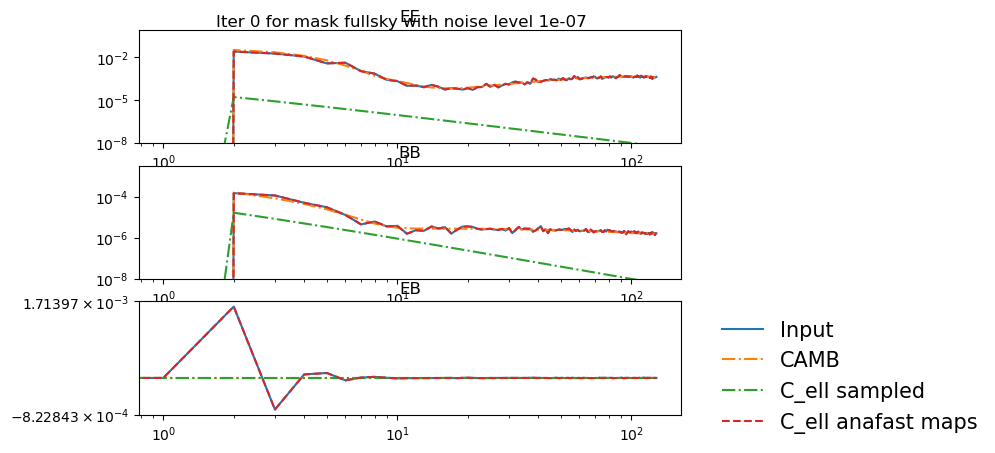

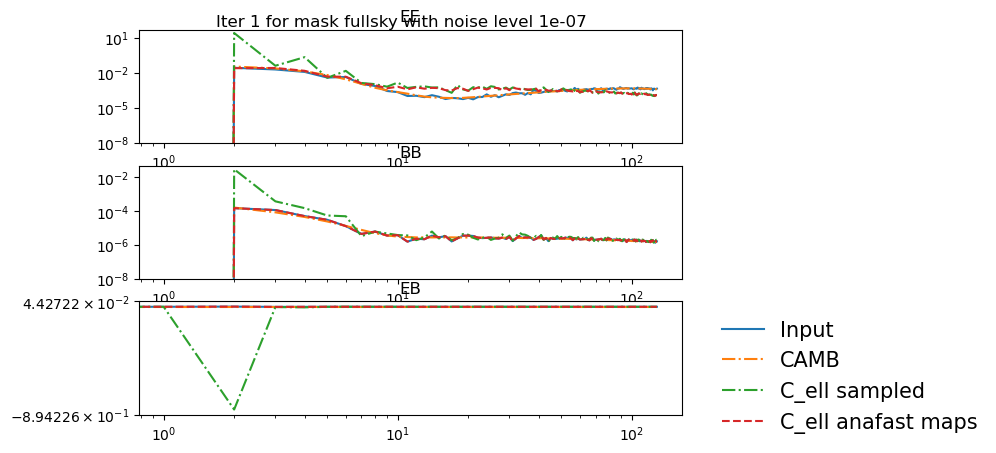

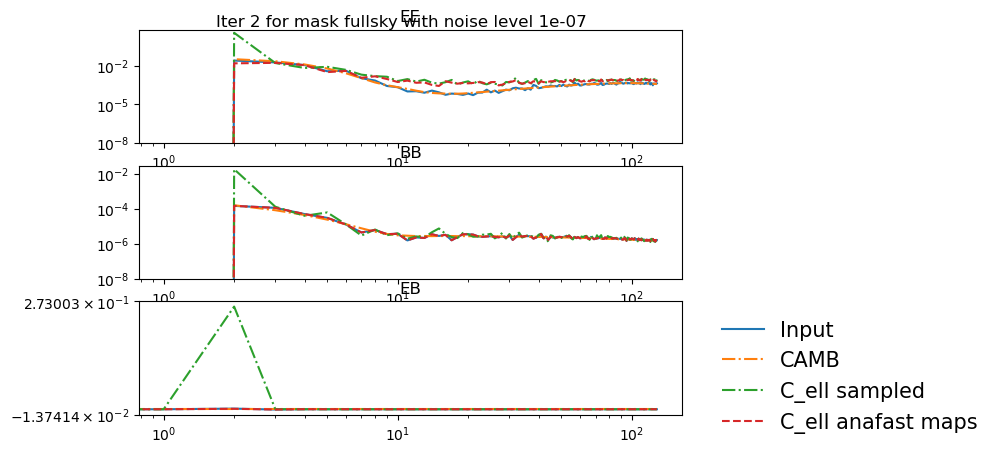

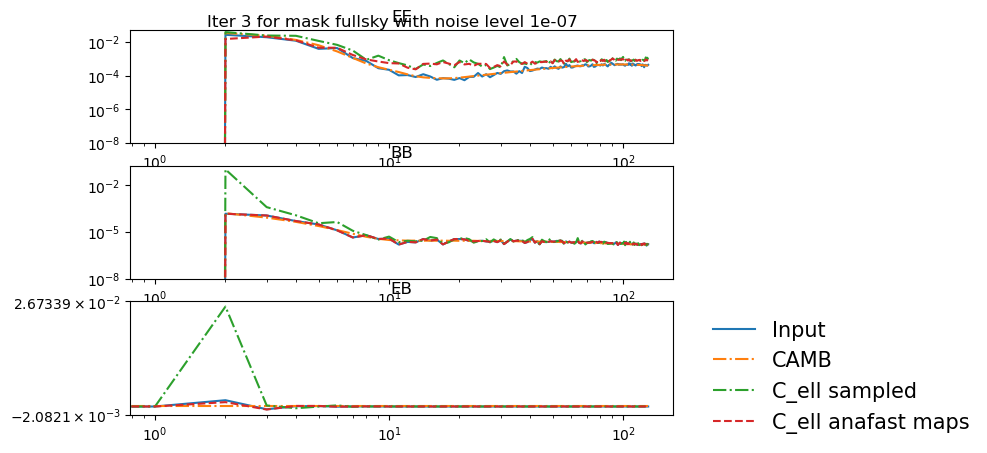

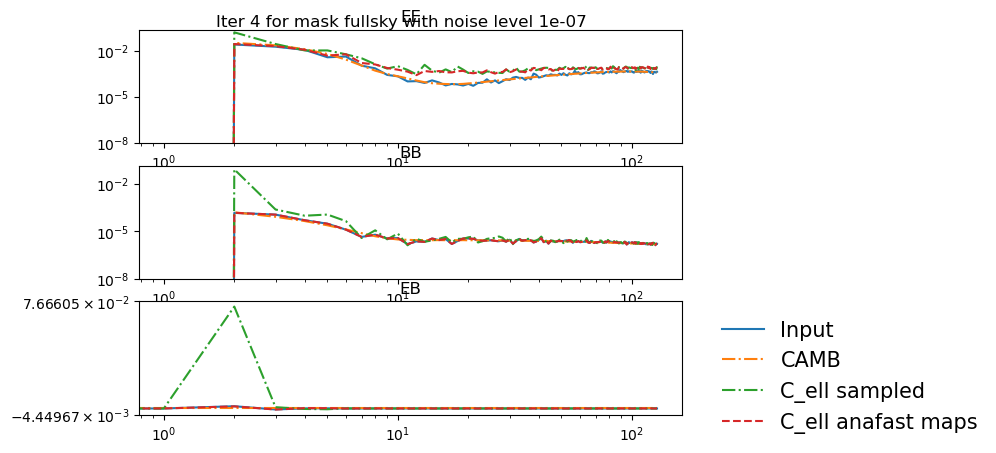

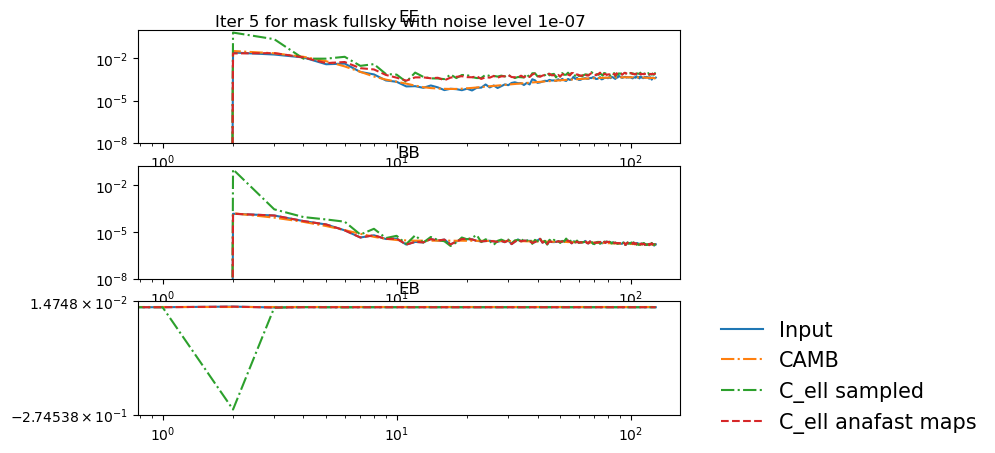

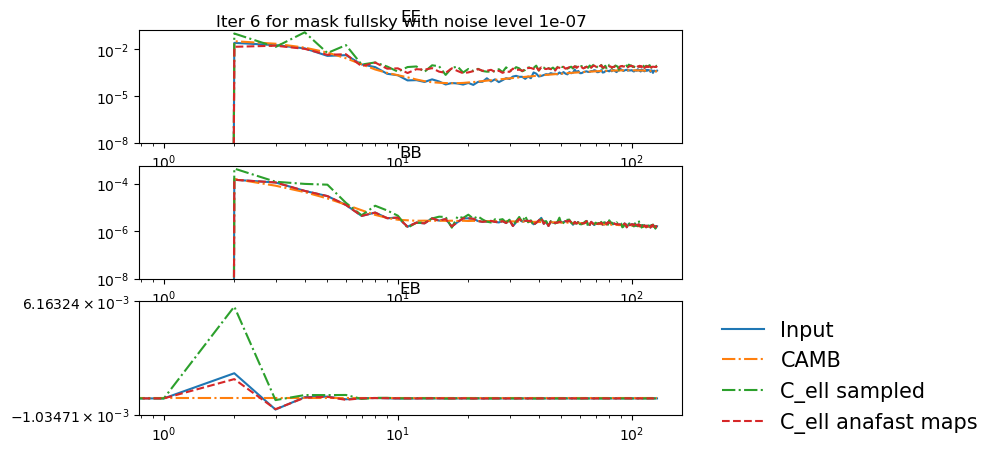

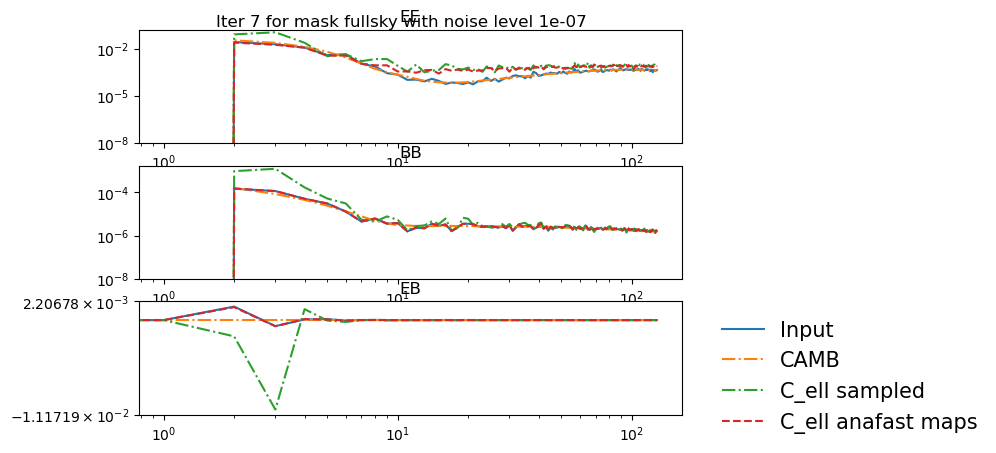

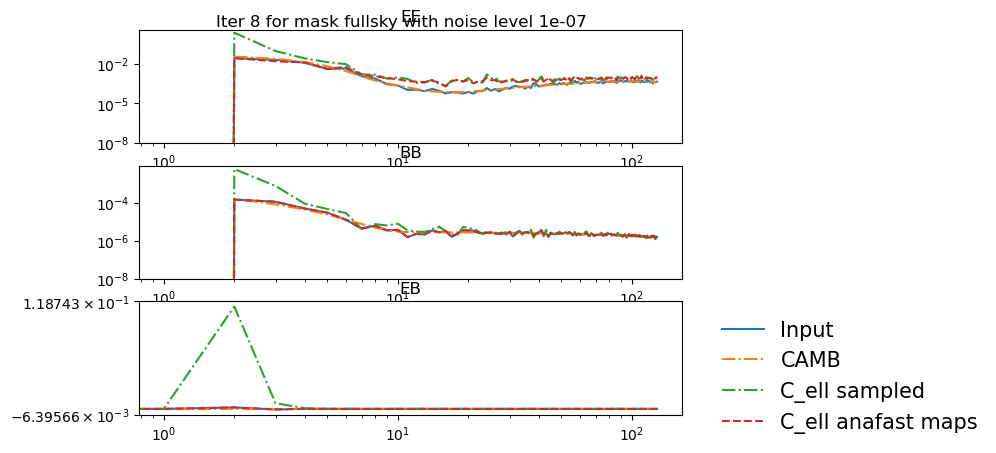

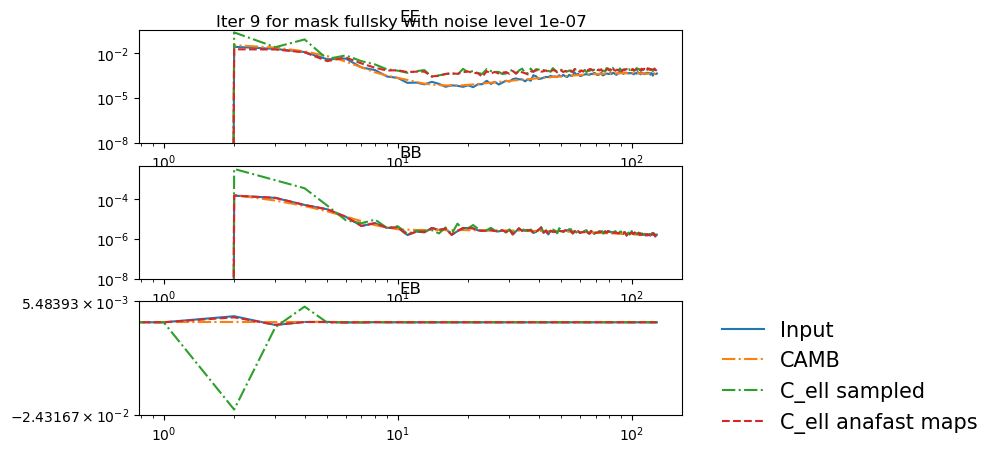

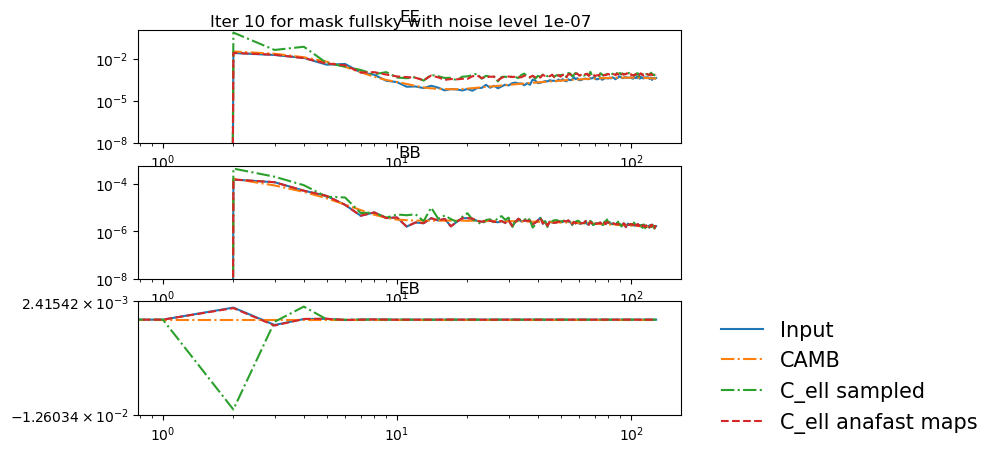

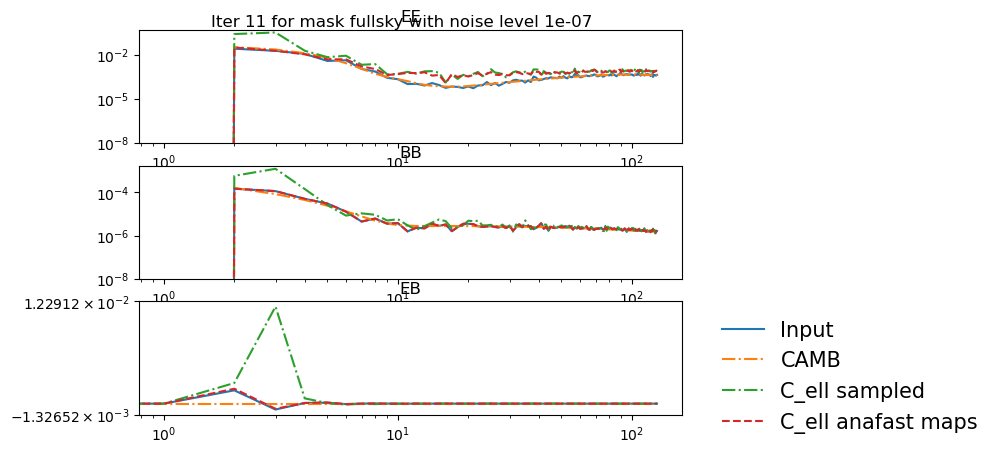

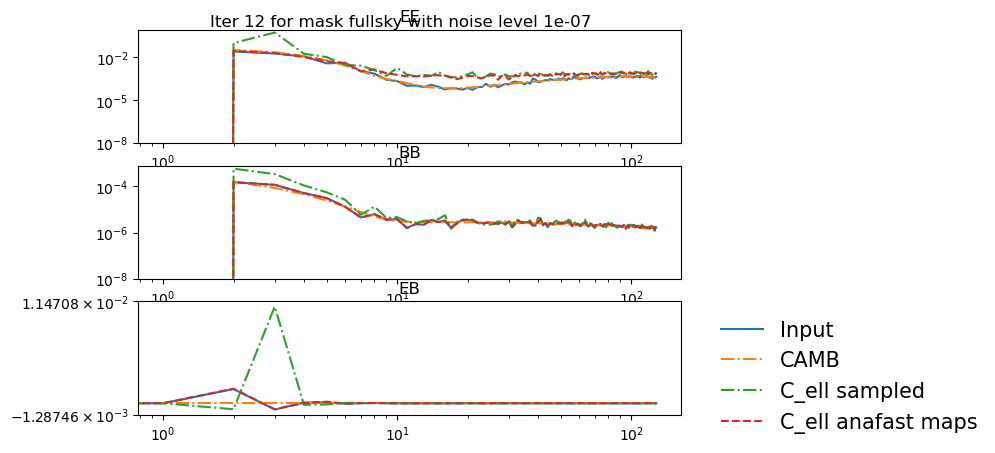

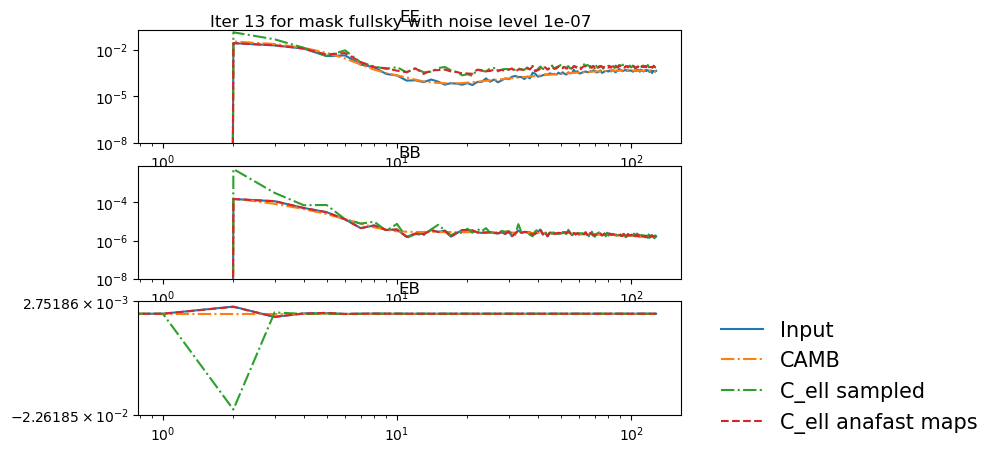

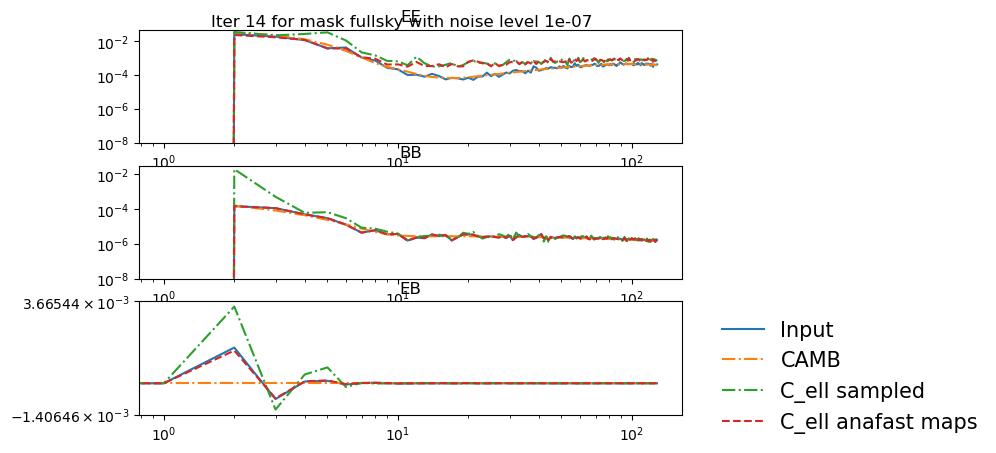

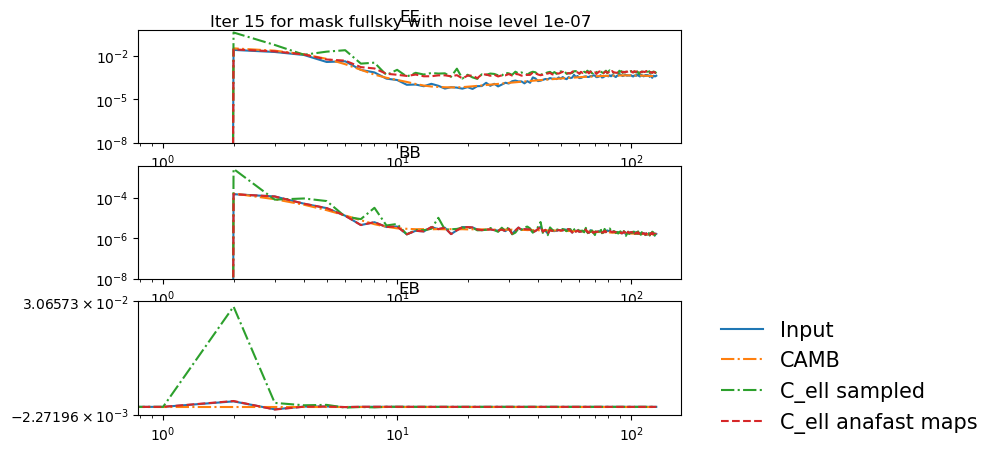

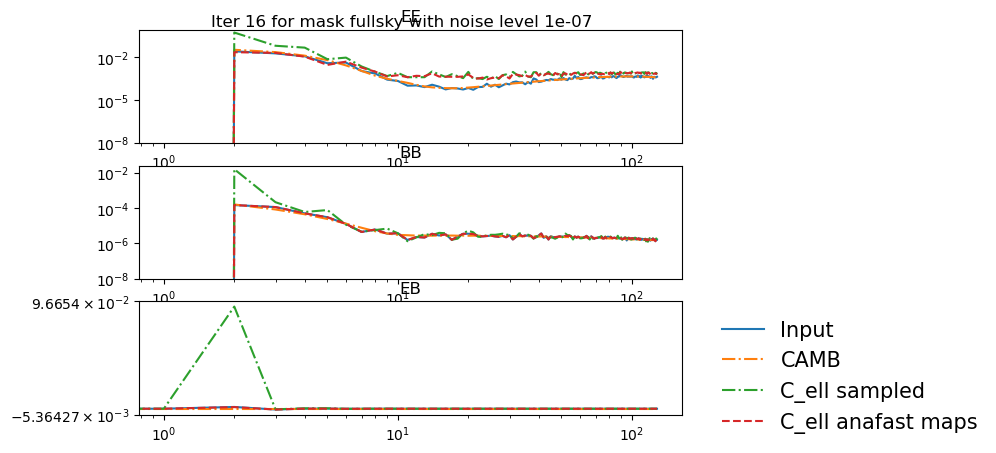

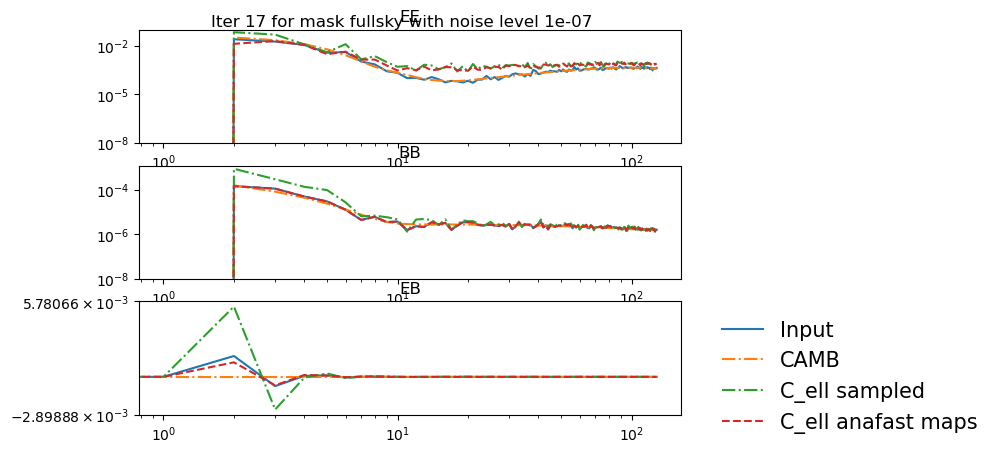

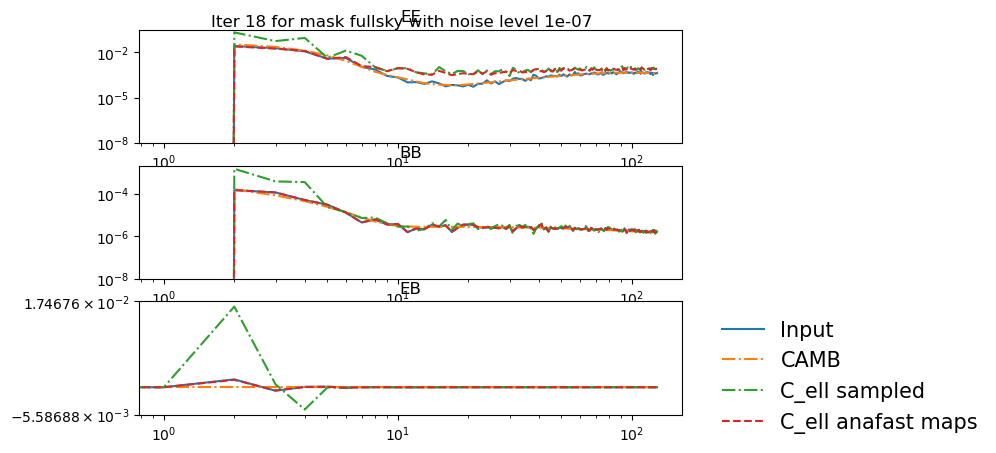

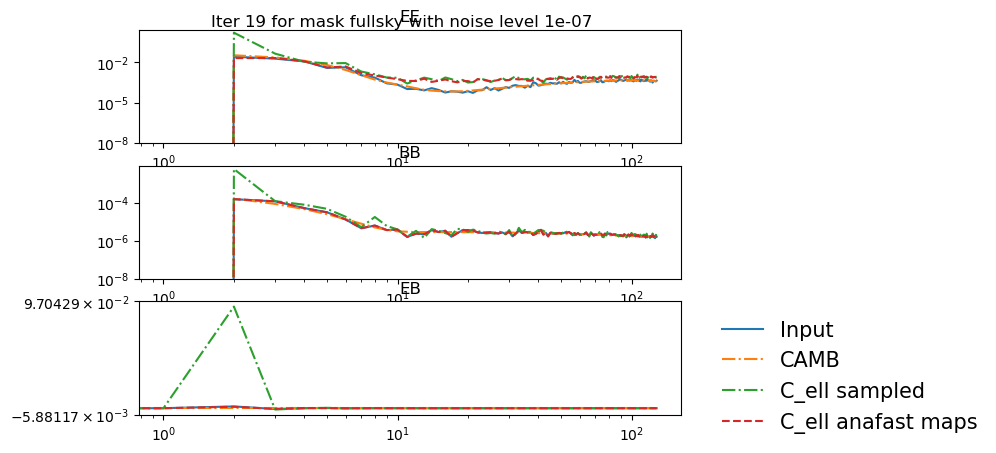

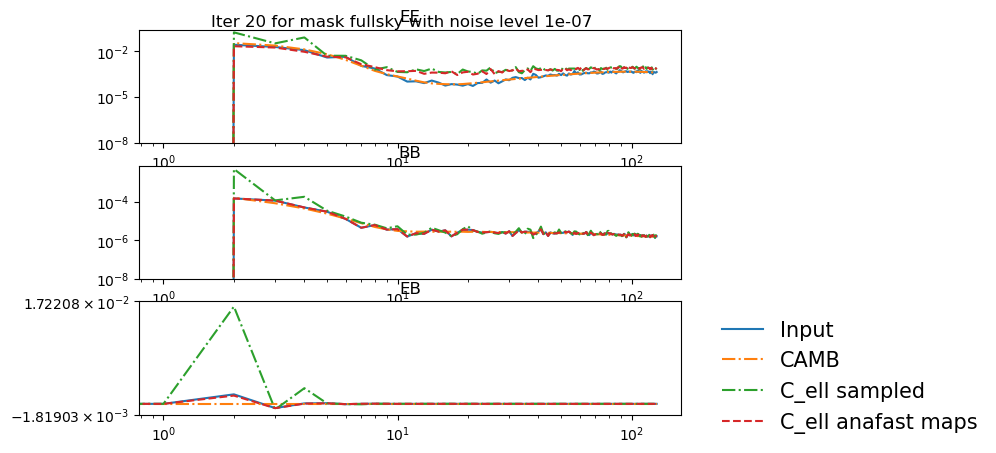

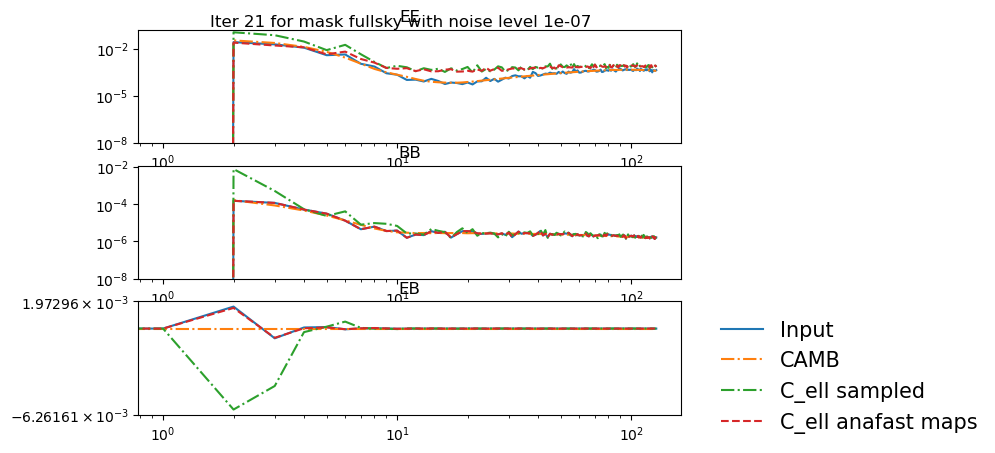

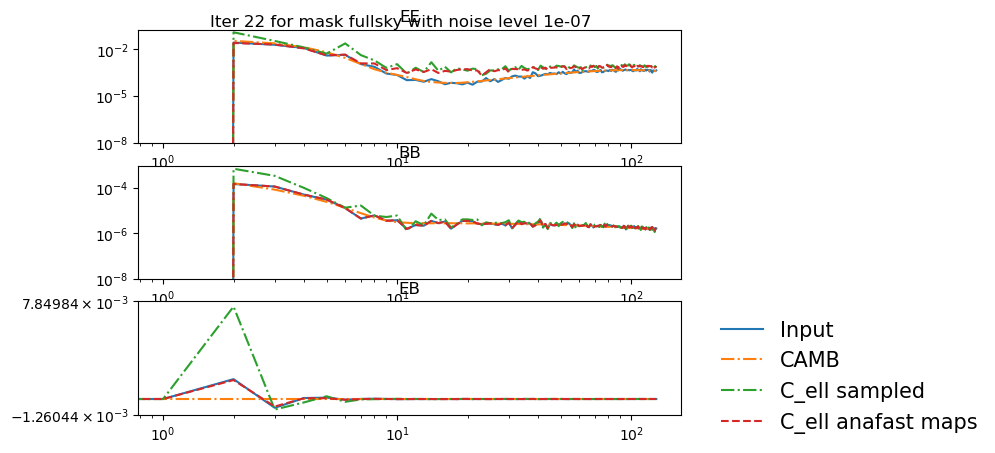

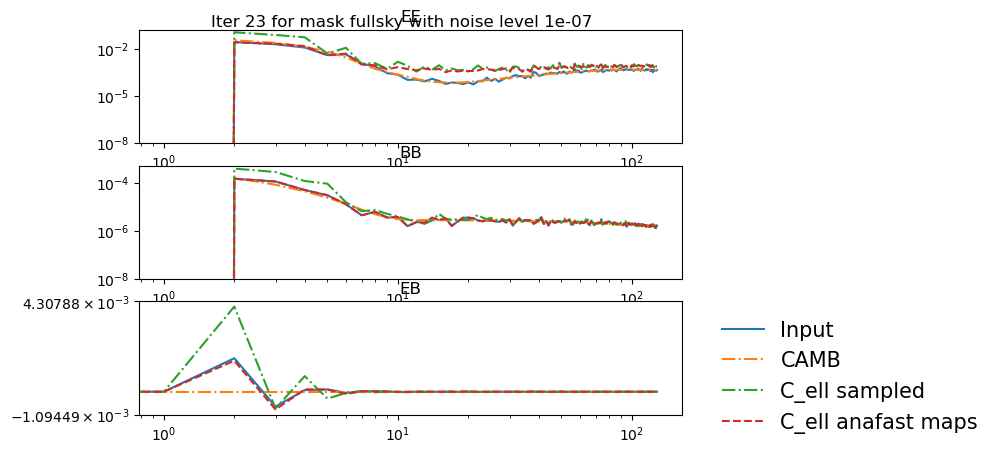

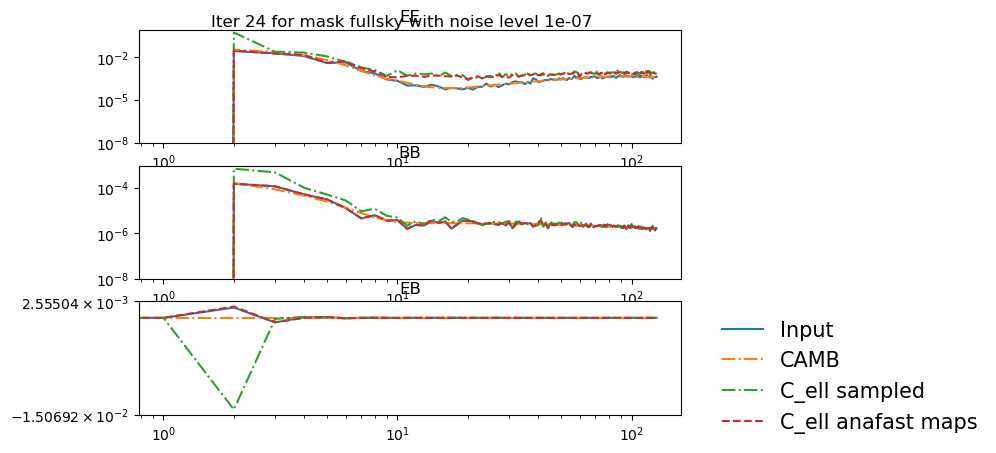

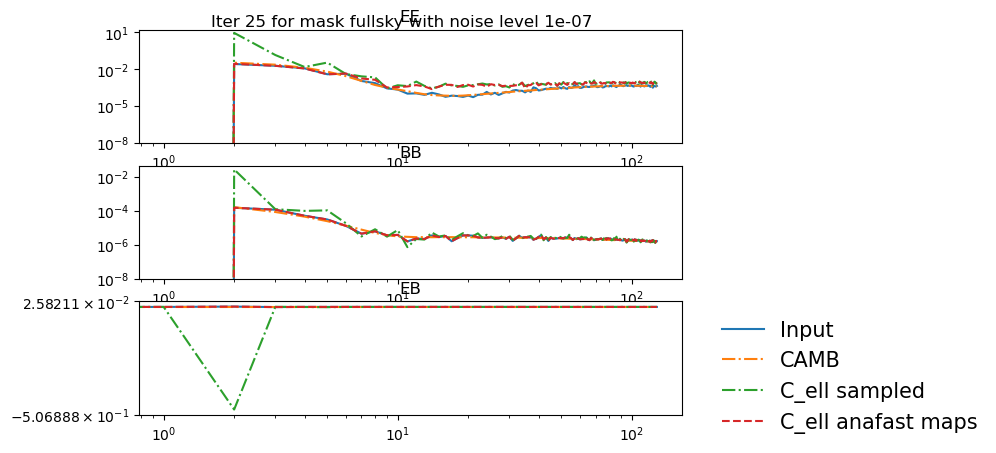

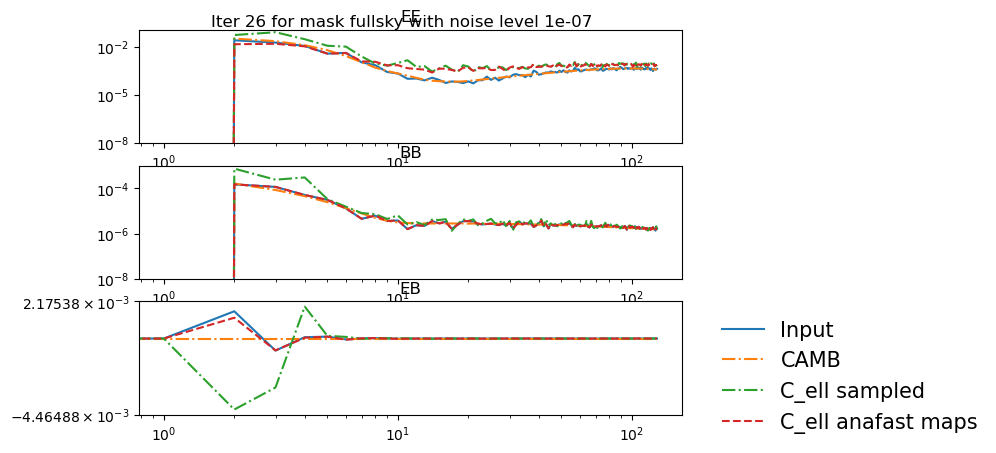

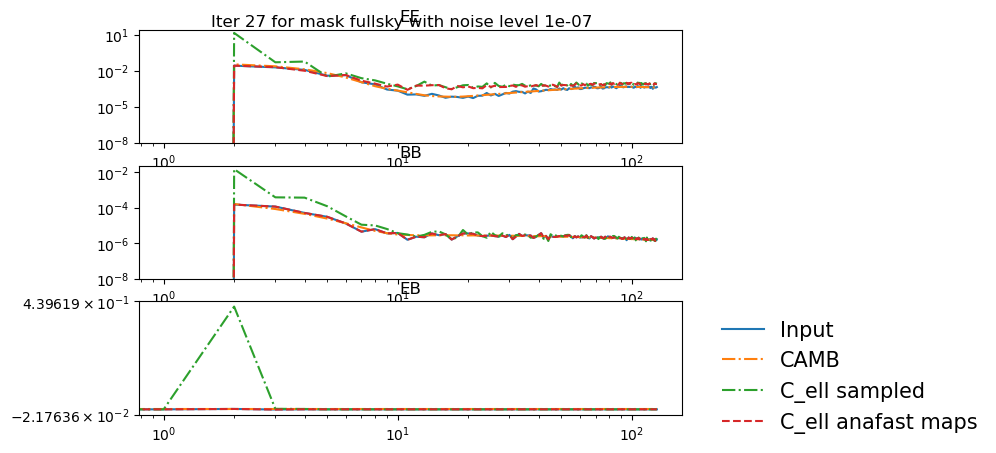

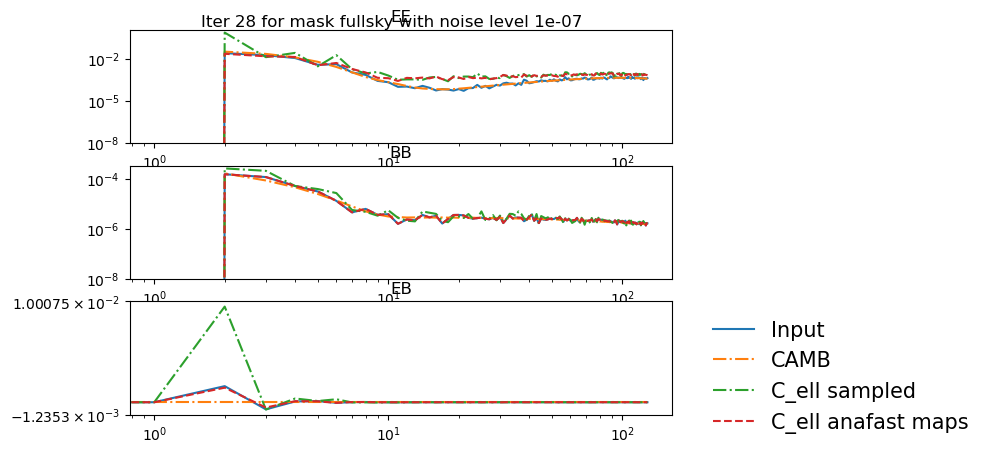

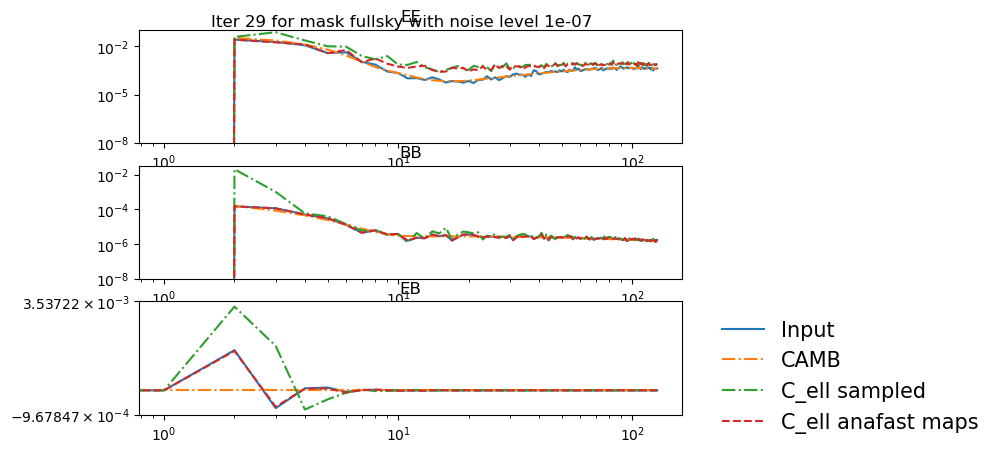

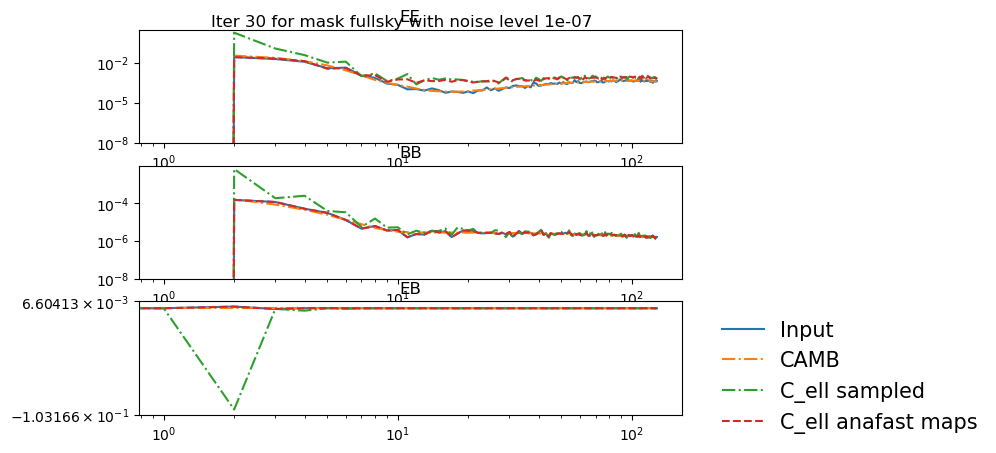

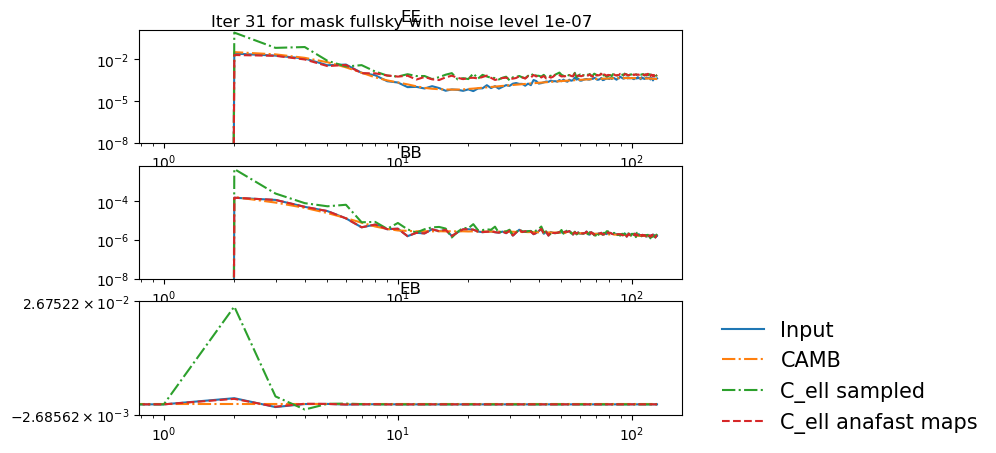

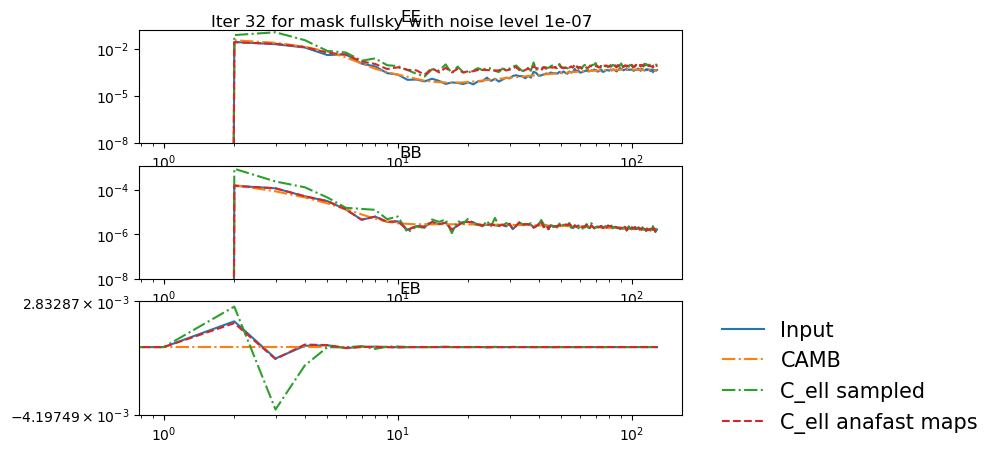

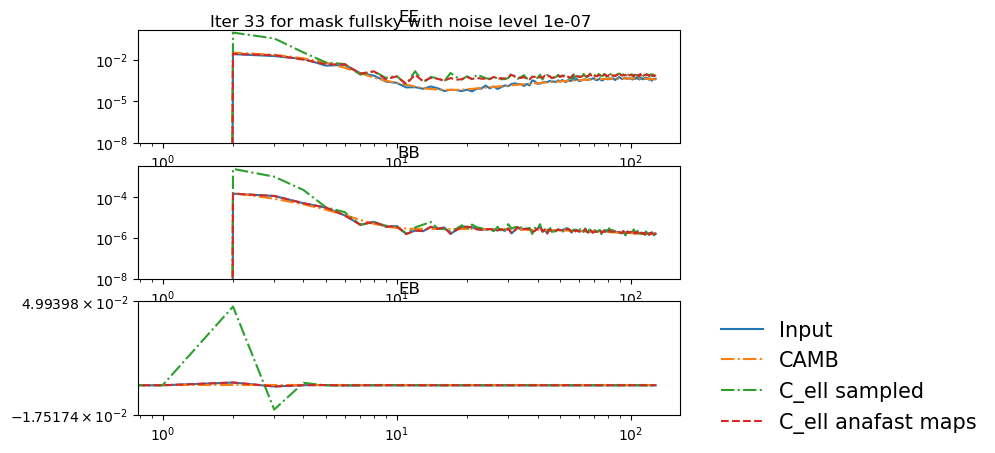

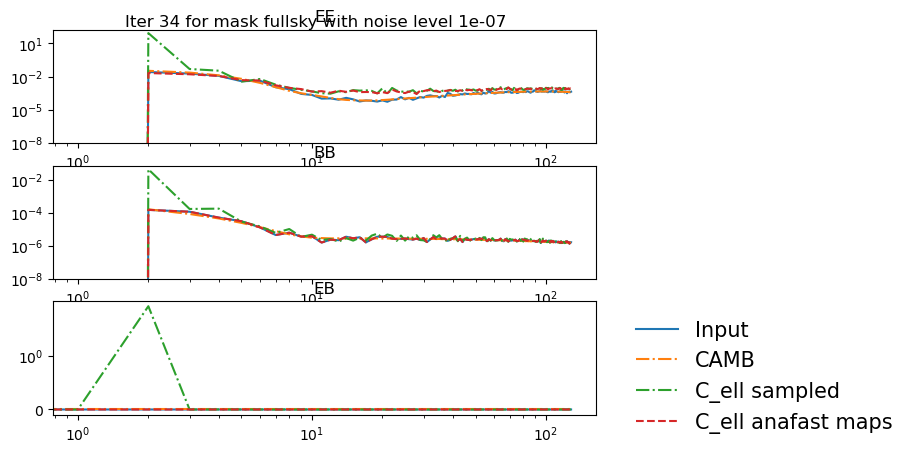

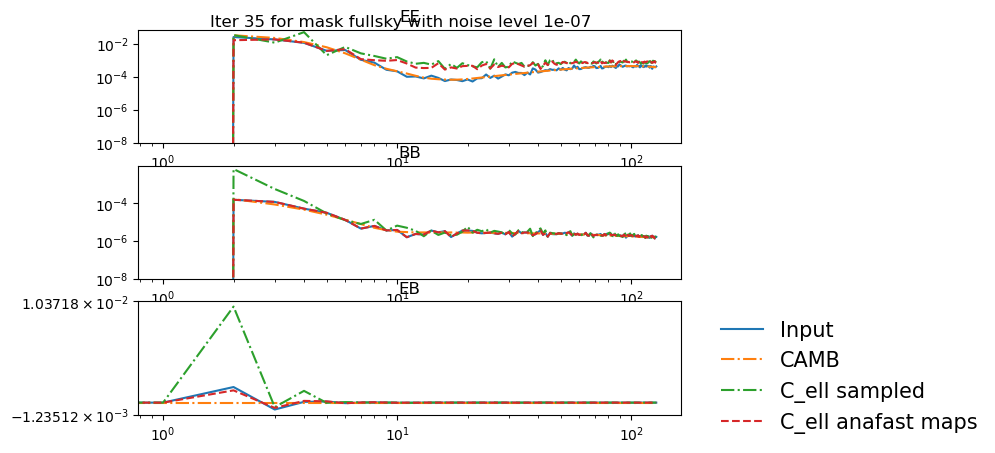

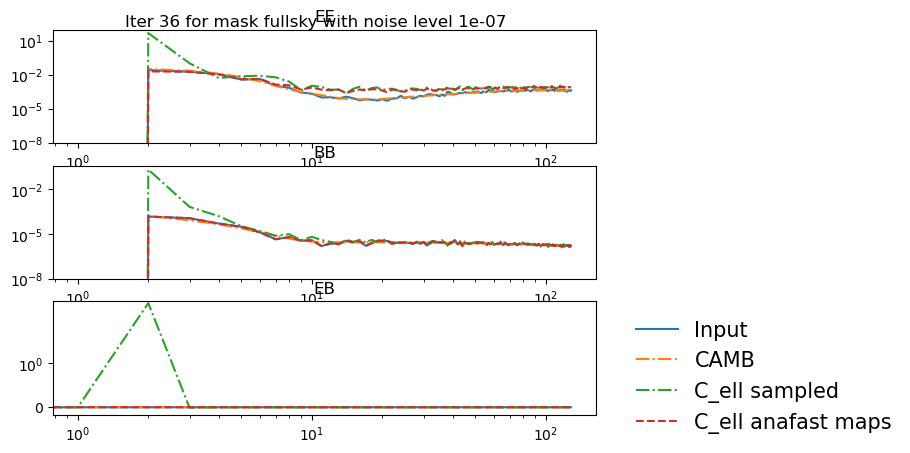

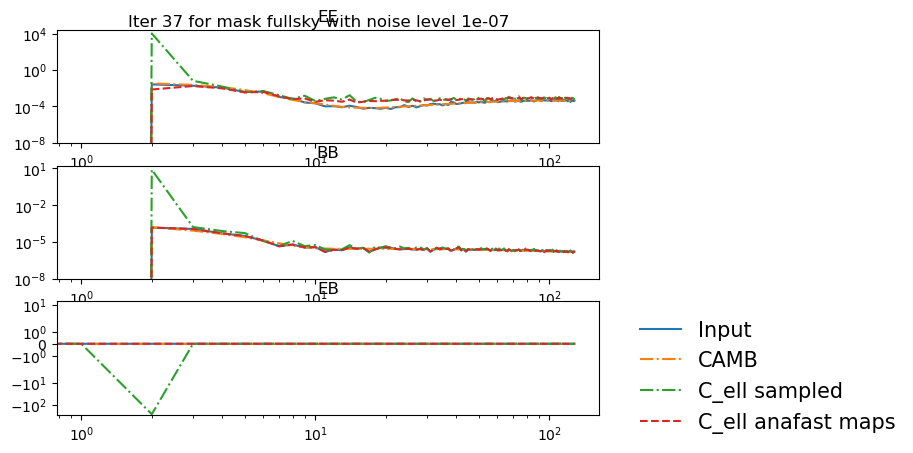

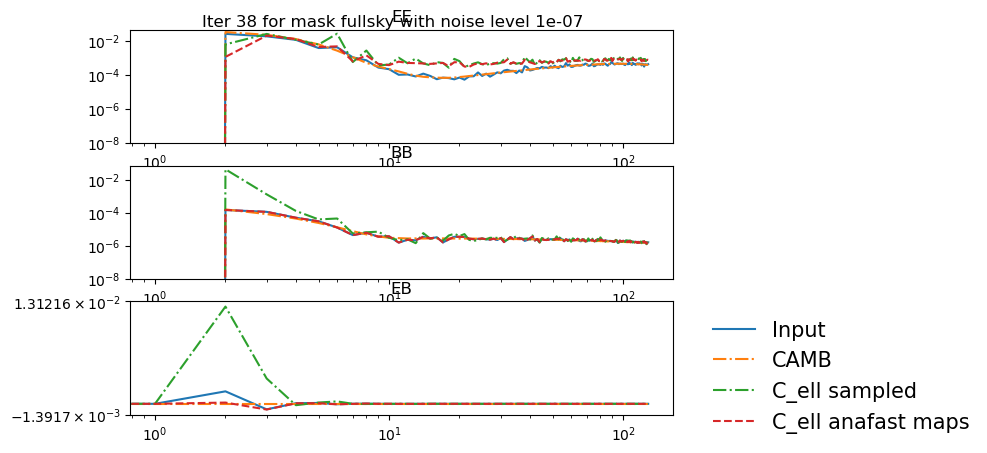

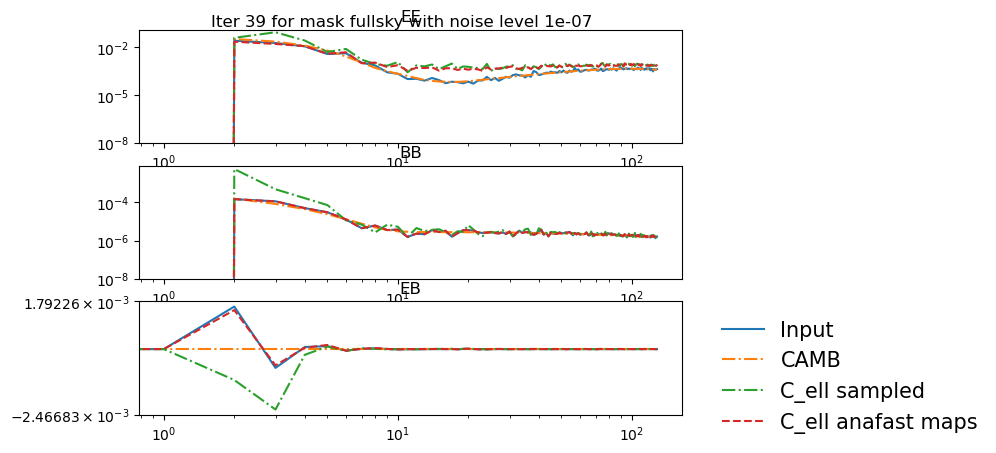

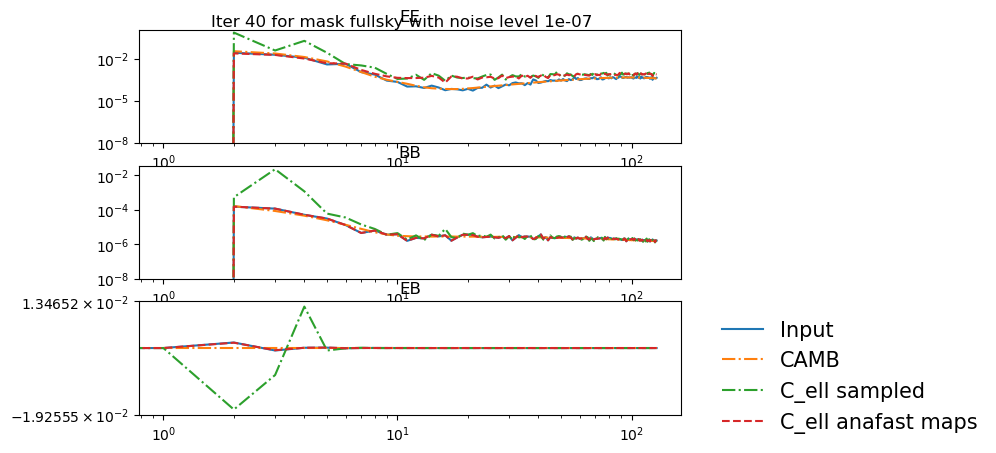

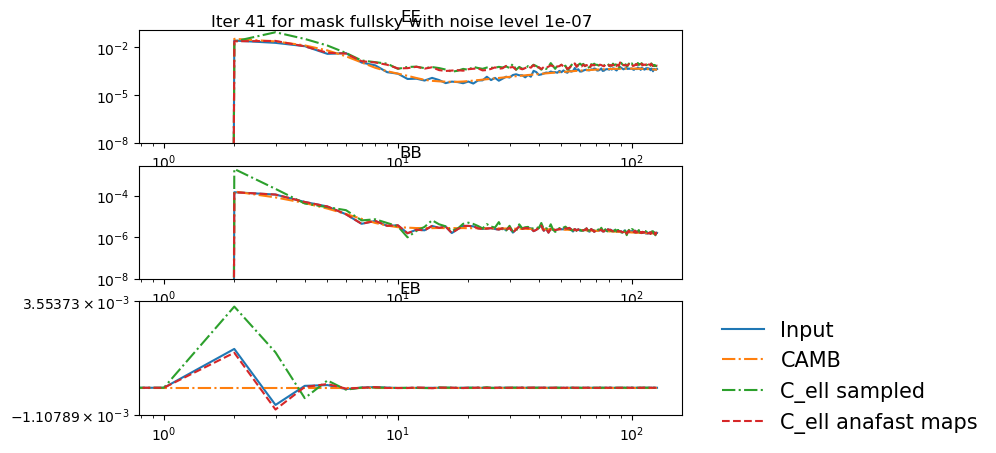

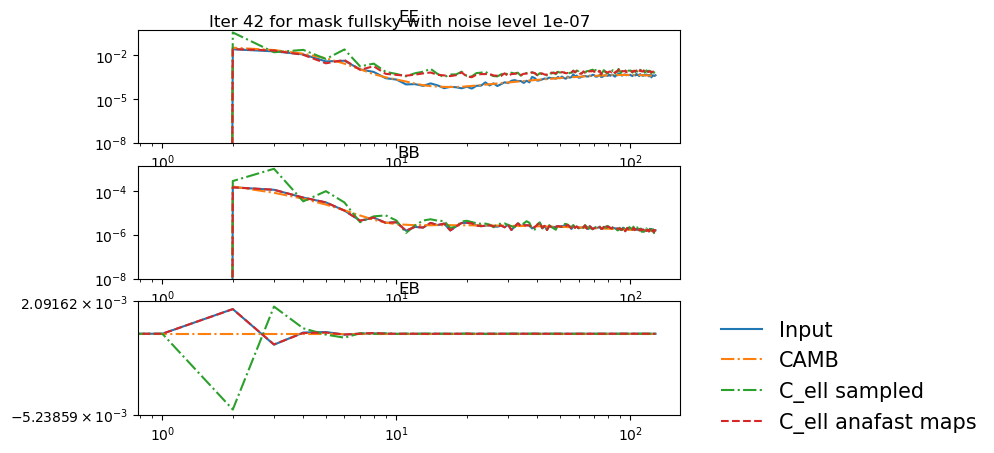

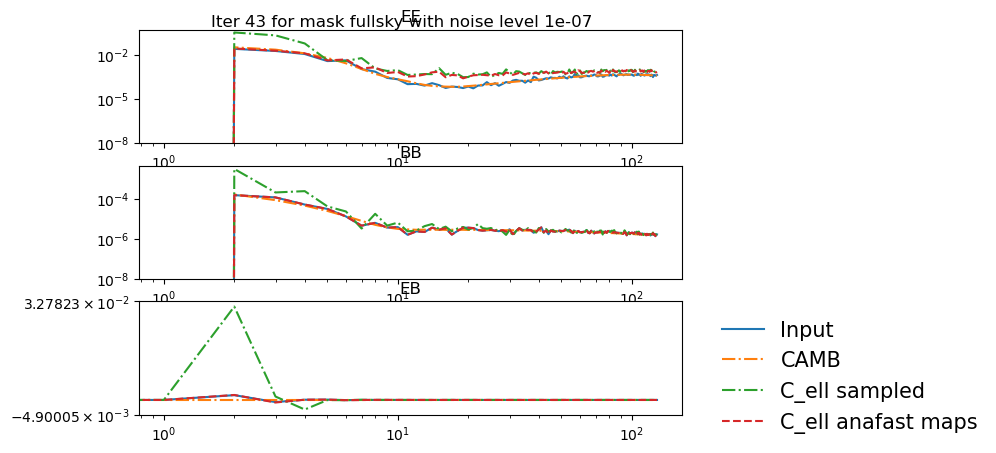

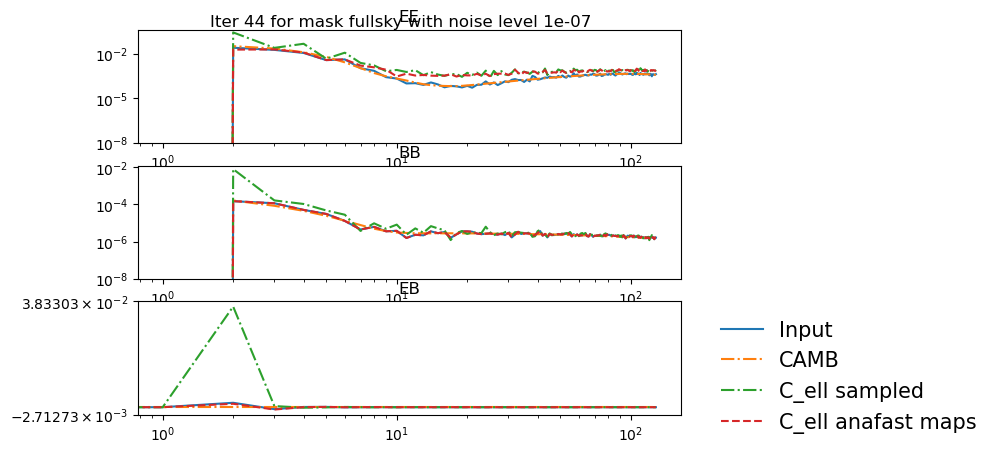

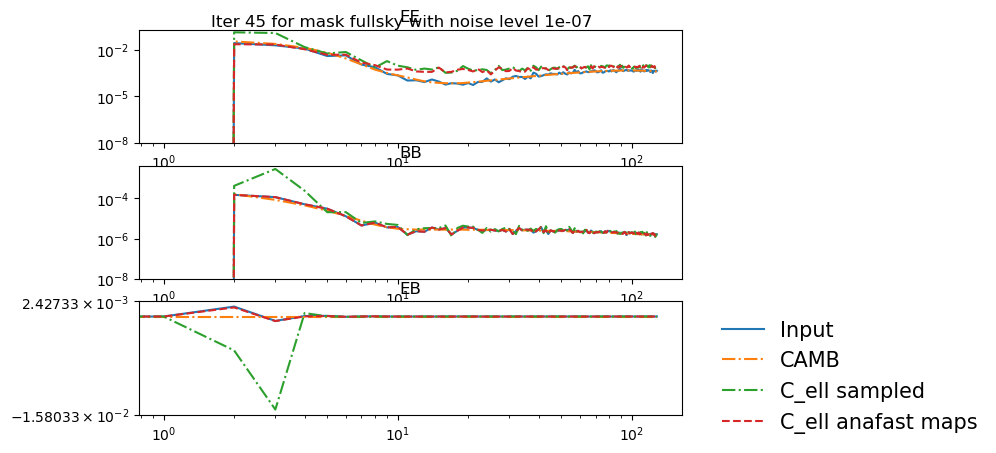

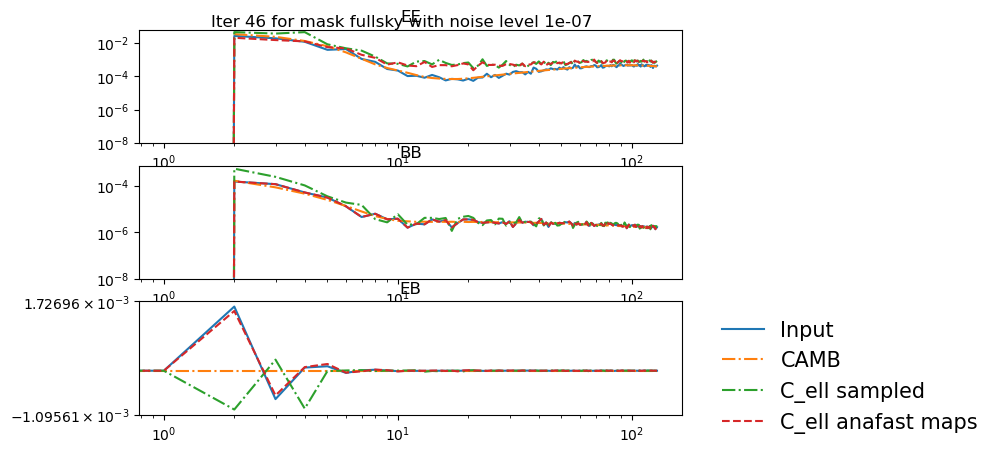

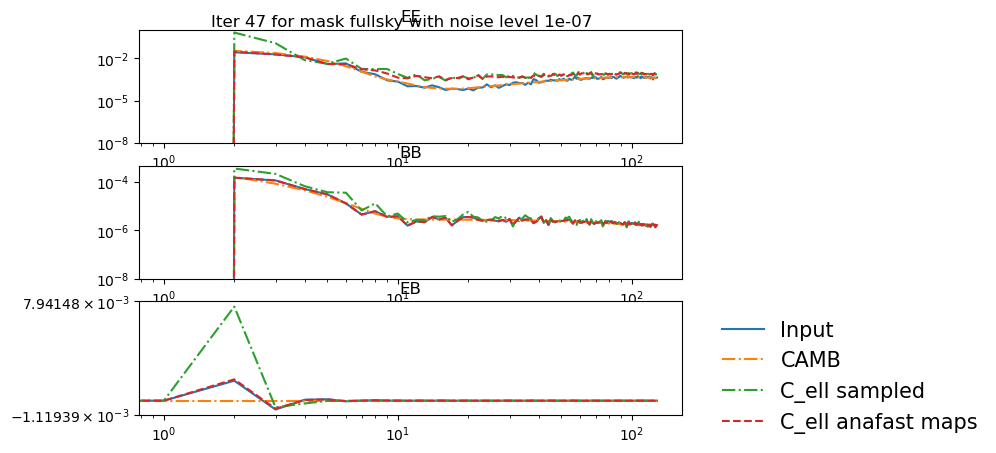

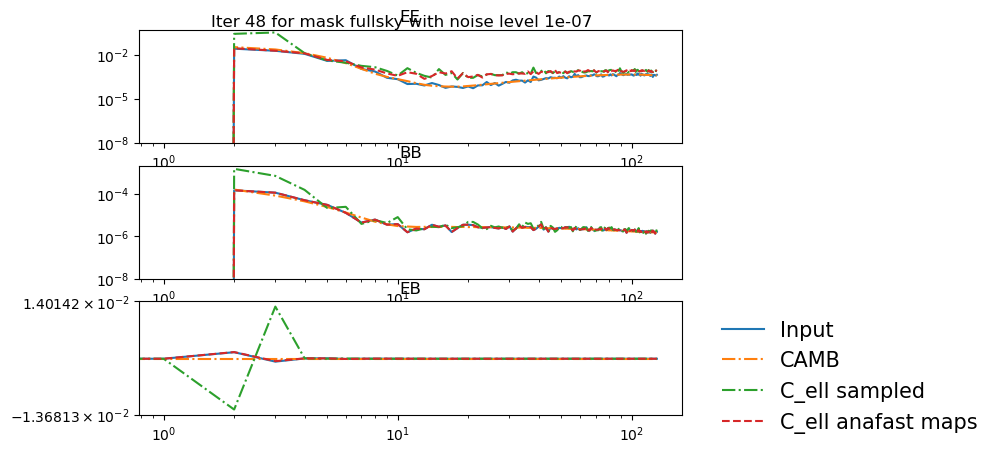

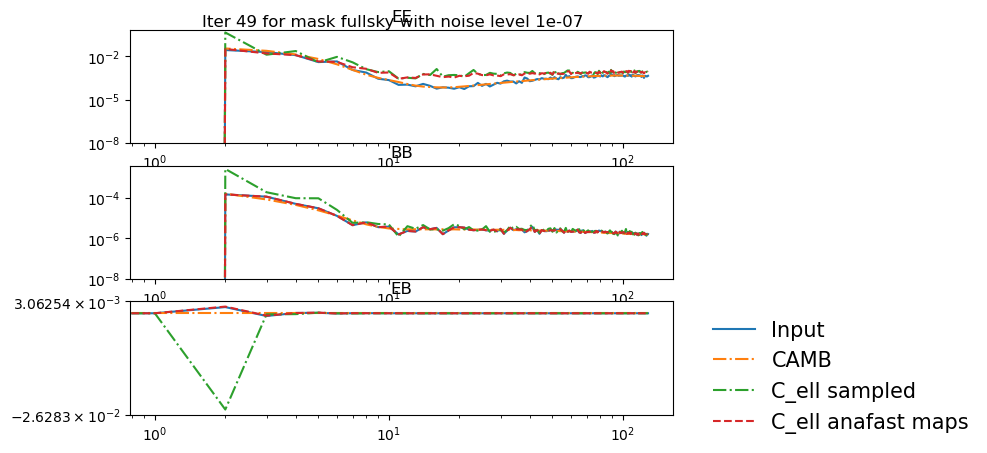

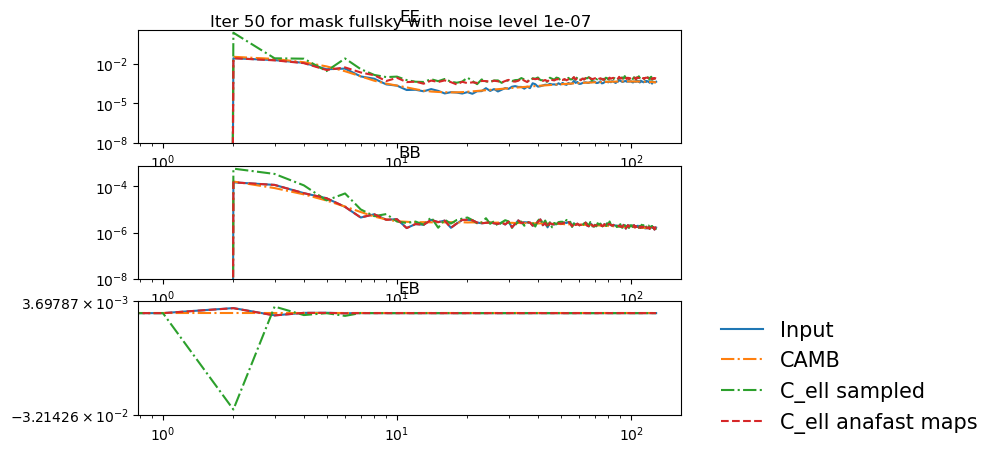

In [71]:
# list_correl = ['TT', 'EE', 'BB', 'TE', 'EB', 'TB']
list_correl = ['EE', 'BB', 'EB']
indices_polar = np.array([1,2,4])

for i in np.arange(0,number_iterations,jump_iter):
    maps_iter = np.vstack([np.zeros(12*nside**2), all_samples_map[i,...]])
    c_ell_iter = all_samples_cells[i,...]

    plt.figure(figsize=(7,5))
    plt.suptitle("Iter {} for mask {} with noise level {}".format(i, mask_name, noise_level), y=0.91)
    
    
    c_ells_output = hp.anafast(maps_iter, lmax=lmax, iter=n_iter)[indices_polar]
    for j in range(number_correl_to_plot):
        ax = plt.subplot(311+j)
        plt.title(list_correl[j])

        plt.plot(ell_arange, c_ells_total.T[:,indices_polar[j]], label='Input')
        plt.plot(ell_arange, c_ells_theory.T[:,indices_polar[j]], '-.', label='CAMB')
        # plt.plot(ell_arange, c_ells_wn.T[:,j], '-.', label='White noise')
        
        
        plt.plot(ell_arange, c_ell_iter.T[:,j], '-.', label='C_ell sampled')
        plt.plot(ell_arange, c_ells_output.T[:,j], '--', label='C_ell anafast maps')
        
        if nstokes == 3 and j < number_correl_to_plot-2:
            plt.xticks(color='w')

        if j <= nstokes-1:
            plt.loglog()
            plt.ylim(ymin=noise_level/10.)
        else:
            plt.xscale('log')
            plt.yscale('symlog')
        # plt.legend()
        if j == position_legend:
            plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)


plt.show()

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 2., 4., 1., 5., 1., 2., 4., 0., 4., 2.,
        4., 2., 1., 2., 4., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 2.]),
 array([3.92156863e-08, 2.00519358e-05, 4.00646560e-05, 6.00773761e-05,
        8.00900962e-05, 1.00102816e-04, 1.20115537e-04, 1.40128257e-04,
        1.60140977e-04, 1.80153697e-04, 2.00166417e-04, 2.20179137e-04,
        2.40191857e-04, 2.60204577e-04, 2.80217298e-04, 3.00230018e-04,
        3.20242738e-04, 3.40255458e-04, 3.60268178e-04, 3.80280898e-04,
        4.00293618e-04, 4.20306339e-04, 4.40319059e-04, 4.60331779e-04,
        4.80344499e-04, 5.00357219e-04, 5.20369939e-04, 5.40382659e-04,
        5.60395380e-04, 5.80408100e-04, 6.00420820e-04, 6.20433540e-04,
        6.40446260e-04, 6.60458980e-04, 6.80471700e-04, 7.00484420e-04,
        7.20497141e-04, 7.40509861e-04, 7.60522581e-04, 7.80535301e-04,
        8.00548021e-04, 8.20560741e-04, 8.40573461

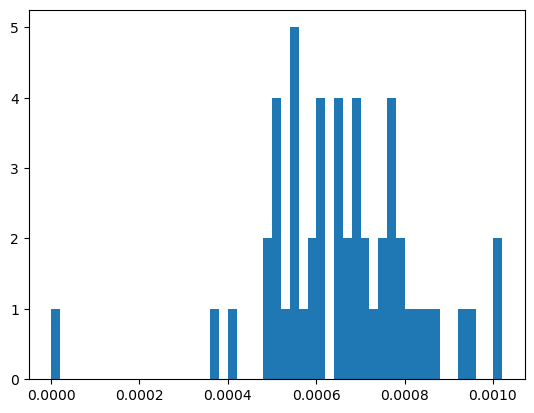

In [72]:
plt.hist(bin_edges[:-1], bin_edges, weights=hist)
